## Importing libraray

In [313]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
%matplotlib inline
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  RandomizedSearchCV, train_test_split , GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from mlxtend.plotting import plot_confusion_matrix
#To turn off warning messages.
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import seaborn as sns

time: 7.43 ms (started: 2024-08-30 15:52:34 -05:00)


In [314]:
df = pd.read_csv('heart_statlog_cleveland_hungary_final.csv')

time: 18.4 ms (started: 2024-08-30 15:52:34 -05:00)


In [315]:
df

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


time: 21.2 ms (started: 2024-08-30 15:52:34 -05:00)


In [316]:
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 1.18 ms (started: 2024-08-30 15:52:34 -05:00)


In [317]:
# df.groupby('age').size().reset_index(name='count').reset_index()
df.to_clipboard()

time: 48.7 ms (started: 2024-08-30 15:52:34 -05:00)


In [318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB
time: 14.3 ms (started: 2024-08-30 15:52:35 -05:00)


In [319]:
for col in df[["sex", "chest pain type", "fasting blood sugar", "resting ecg", "exercise angina", "ST slope", "target"]]:
    print(df[col].value_counts()) 
    print("---------------------------")

sex
1    909
0    281
Name: count, dtype: int64
---------------------------
chest pain type
4    625
3    283
2    216
1     66
Name: count, dtype: int64
---------------------------
fasting blood sugar
0    936
1    254
Name: count, dtype: int64
---------------------------
resting ecg
0    684
2    325
1    181
Name: count, dtype: int64
---------------------------
exercise angina
0    729
1    461
Name: count, dtype: int64
---------------------------
ST slope
2    582
1    526
3     81
0      1
Name: count, dtype: int64
---------------------------
target
1    629
0    561
Name: count, dtype: int64
---------------------------
time: 8.58 ms (started: 2024-08-30 15:52:35 -05:00)


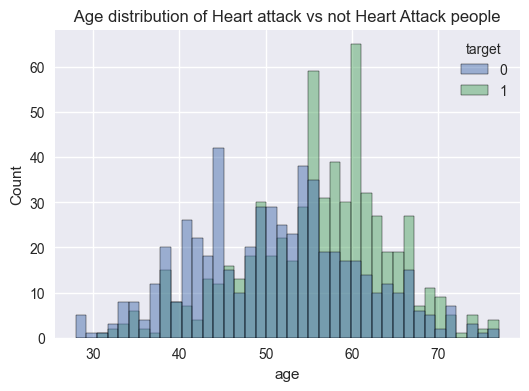

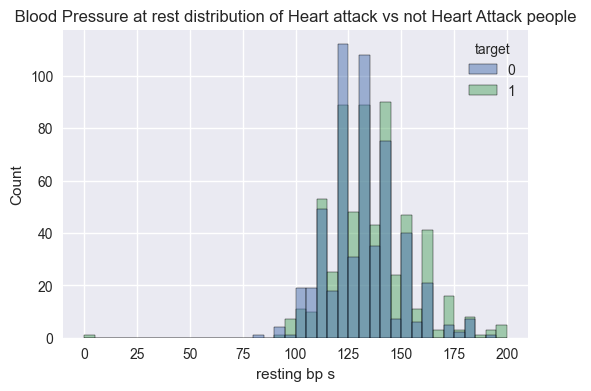

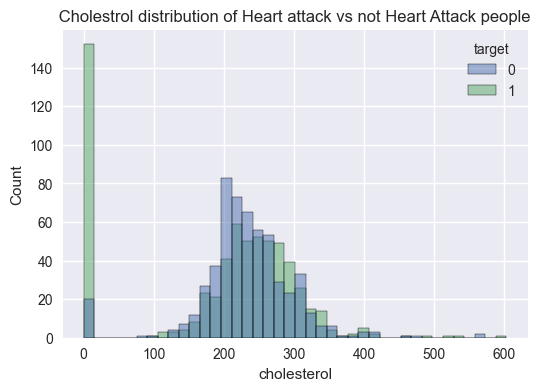

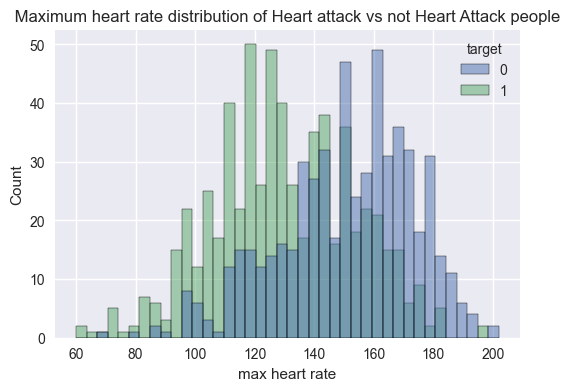

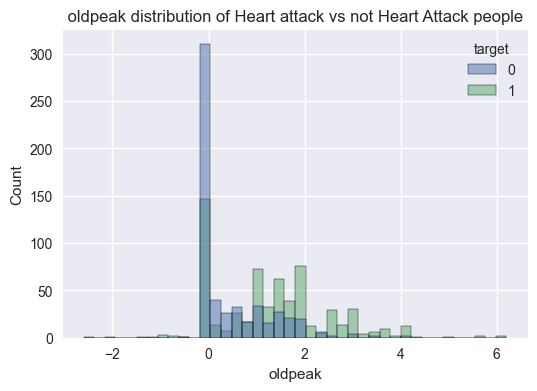

time: 629 ms (started: 2024-08-30 15:52:35 -05:00)


In [320]:
Dictionary={"age":"Age" , "resting bp s":"Blood Pressure at rest" , "cholesterol":"Cholestrol", "max heart rate":"Maximum heart rate" , "oldpeak":"oldpeak"}

for col in df[["age","resting bp s","cholesterol", "max heart rate","oldpeak"]]:
    plt.figure(figsize=(6 , 4))
    sns.histplot(x=col, data=df , bins=40  , hue="target")
    plt.title(f" {Dictionary[col]} distribution of Heart attack vs not Heart Attack people ")
    plt.show()

In [321]:
# cols = ['sex', 'chest pain type','fasting blood sugar', 'resting ecg', 'max heart rate',
#        'exercise angina', 'ST slope']
# plt.figure(figsize=(10 , 8))
# df_long = pd.melt(df, id_vars=["target"], value_vars=cols)

# diagram = sns.catplot( x="variable", hue="value", col="target",data=df_long, kind="count",aspect=1.5)

# diagram.set_axis_labels("Variable", "Count")
# diagram.set_titles("Output {col_name}")
# plt.show()

time: 195 µs (started: 2024-08-30 15:52:36 -05:00)


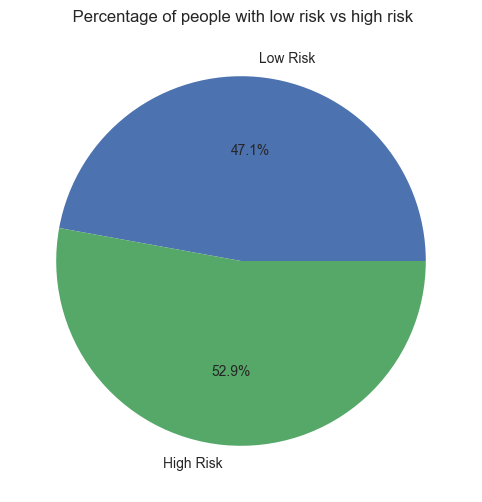

time: 47.9 ms (started: 2024-08-30 15:52:36 -05:00)


In [322]:
plt.figure(figsize=(8 , 6))
labels=["Low Risk" , "High Risk"]
sizes=[df.target.value_counts()[0] ,df.target.value_counts()[1]]
plt.pie(sizes, labels=labels , autopct='%1.1f%%')
plt.title(" Percentage of people with low risk vs high risk")
plt.axis('off')
plt.show()
# label data are almost balance 

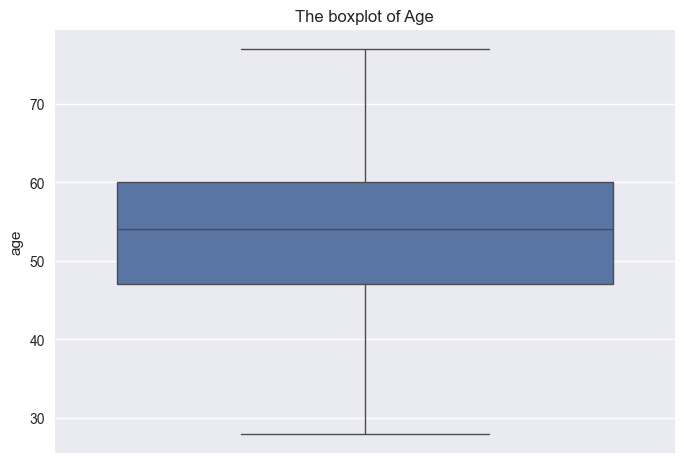

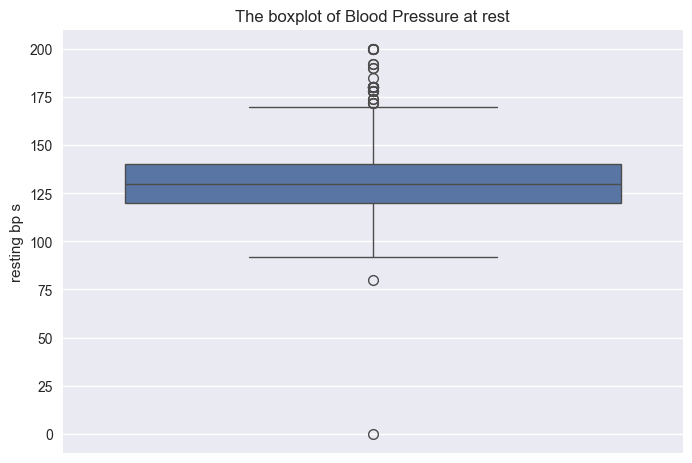

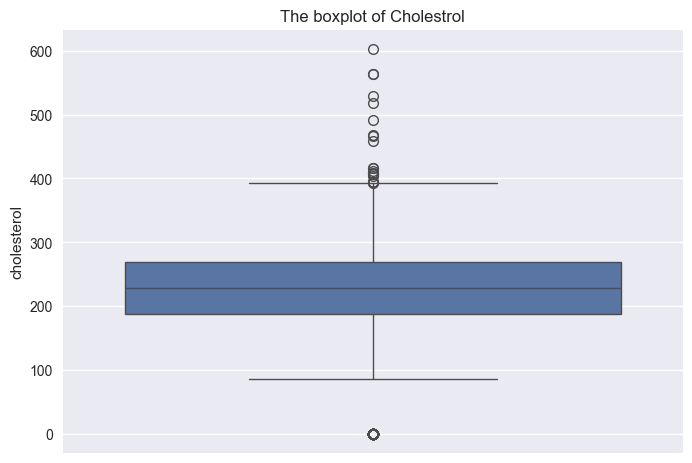

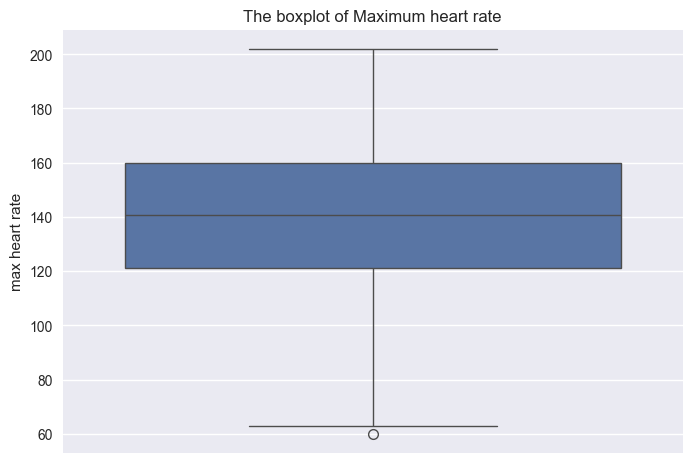

time: 329 ms (started: 2024-08-30 15:52:36 -05:00)


In [323]:
Dictionary={"age":"Age" , "resting bp s":"Blood Pressure at rest" , "cholesterol":"Cholestrol", "max heart rate":"Maximum heart rate"}
for col in df[["age" , "resting bp s" ,  "cholesterol" , "max heart rate"]]:
    sns.boxplot(y=col , data=df)
    plt.xlabel={col}
    plt.title(f"The boxplot of {Dictionary[col]}")
    plt.show()

In [324]:
def find_and_remove_outlier(col):
    print(col)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

    upper_array = np.where(df[col]>=upper)[0]
    lower_array = np.where(df[col]<=lower)[0]

    df.drop(index=upper_array, inplace=True)
    df.drop(index=lower_array, inplace=True)

    df.reset_index(drop=True, inplace=True)


time: 540 µs (started: 2024-08-30 15:52:36 -05:00)


In [325]:
for col in ["age" ,"resting bp s" ,  "cholesterol" , "max heart rate" , "oldpeak"]:
    find_and_remove_outlier(col)

age
resting bp s
cholesterol
max heart rate
oldpeak
time: 6.54 ms (started: 2024-08-30 15:52:36 -05:00)


In [326]:
df

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
933,45,1,1,110,264,0,0,132,0,1.2,2,1
934,68,1,4,144,193,1,0,141,0,3.4,2,1
935,57,1,4,130,131,0,0,115,1,1.2,2,1
936,57,0,2,130,236,0,2,174,0,0.0,2,1


time: 4.07 ms (started: 2024-08-30 15:52:36 -05:00)


In [327]:
df_long = pd.melt(df, id_vars=["target"], value_vars=col)
df_long

,target,variable,value
0,0,oldpeak,0.0
1,1,oldpeak,1.0
2,0,oldpeak,0.0
3,1,oldpeak,1.5
4,0,oldpeak,0.0
...,...,...,...
933,1,oldpeak,1.2
934,1,oldpeak,3.4
935,1,oldpeak,1.2
936,1,oldpeak,0.0


time: 4.17 ms (started: 2024-08-30 15:52:36 -05:00)


In [328]:
#EDA
df.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

time: 3.08 ms (started: 2024-08-30 15:52:36 -05:00)


In [329]:
df.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

time: 3.17 ms (started: 2024-08-30 15:52:36 -05:00)


In [330]:
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

time: 9.3 ms (started: 2024-08-30 15:52:37 -05:00)


In [331]:
# columns = df.columns.difference(['target']) # getting all columns except target
# for col in columns:
#     plt.scatter(df[col],df['target'])
#     plt.title(f'Noise in ' + col + ' Column' )
#     plt.xlabel(col)
#     plt.ylabel('target')
#     plt.grid()
#     plt.show()

time: 454 µs (started: 2024-08-30 15:52:37 -05:00)


In [332]:
#df3=df[df['cholesterol']>0]
#Crestrol below zero has noise, that's why we remove these noises

time: 323 µs (started: 2024-08-30 15:52:37 -05:00)


In [333]:
#df3.describe()

time: 297 µs (started: 2024-08-30 15:52:37 -05:00)


In [334]:
#The minimum age is 28 years and the maximum age is 77 years

#The lowest resting bp s is 92 and the highest is 200

#The lowest cholestoral value is 85 and the highest is 603

#The lowest value of the maximum heart rate is 69 and the highest is 202

time: 381 µs (started: 2024-08-30 15:52:37 -05:00)


In [335]:
for i in df.columns:
    print (i,len(df[i].unique()))

age 48
sex 2
chest pain type 4
resting bp s 54
cholesterol 201
fasting blood sugar 2
resting ecg 3
max heart rate 105
exercise angina 2
oldpeak 36
ST slope 4
target 2
time: 4.76 ms (started: 2024-08-30 15:52:38 -05:00)


In [336]:
import matplotlib.pyplot as plt
matrix = df.corr()
print(matrix)
#Creating and printing a correlation matrix


                          age       sex  chest pain type  resting bp s  \
age                  1.000000  0.020338         0.141899      0.259307   
sex                  0.020338  1.000000         0.144369      0.059323   
chest pain type      0.141899  0.144369         1.000000      0.008212   
resting bp s         0.259307  0.059323         0.008212      1.000000   
cholesterol          0.104616 -0.093045         0.066771      0.096506   
fasting blood sugar  0.198878  0.096753        -0.008688      0.159173   
resting ecg          0.190797  0.016305         0.097492      0.041463   
max heart rate      -0.390133 -0.140526        -0.324924     -0.109400   
exercise angina      0.202306  0.216642         0.417503      0.115287   
oldpeak              0.267649  0.153438         0.254824      0.162316   
ST slope             0.225427  0.130159         0.277069      0.082471   
target               0.279695  0.317916         0.456432      0.141675   

                     cholesterol  fas

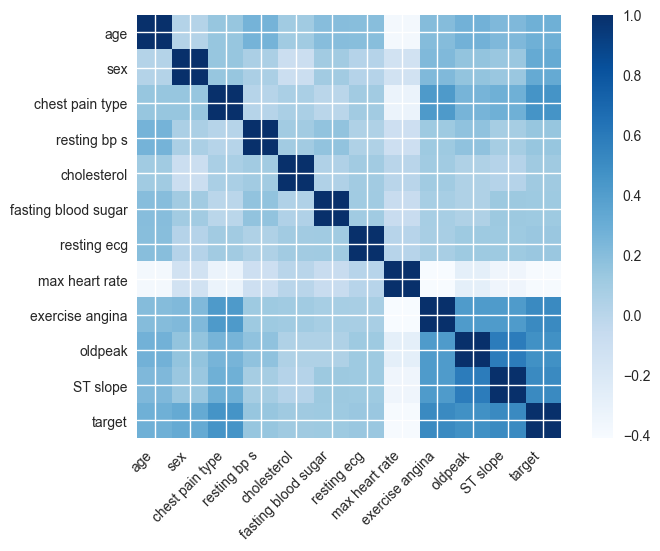

time: 125 ms (started: 2024-08-30 15:52:38 -05:00)


In [337]:
#plotting correlation matrix 
plt.imshow(matrix, cmap='Blues')

#adding colorbar 
plt.colorbar()

# Adding labels to the matrix
plt.xticks(range(len(matrix)), matrix.columns, rotation=45, ha='right')
plt.yticks(range(len(matrix)), matrix.columns)
# Display the plot
plt.show()


# Feature selection 


## Feature selection using SelectKBest with ANOVA F-value

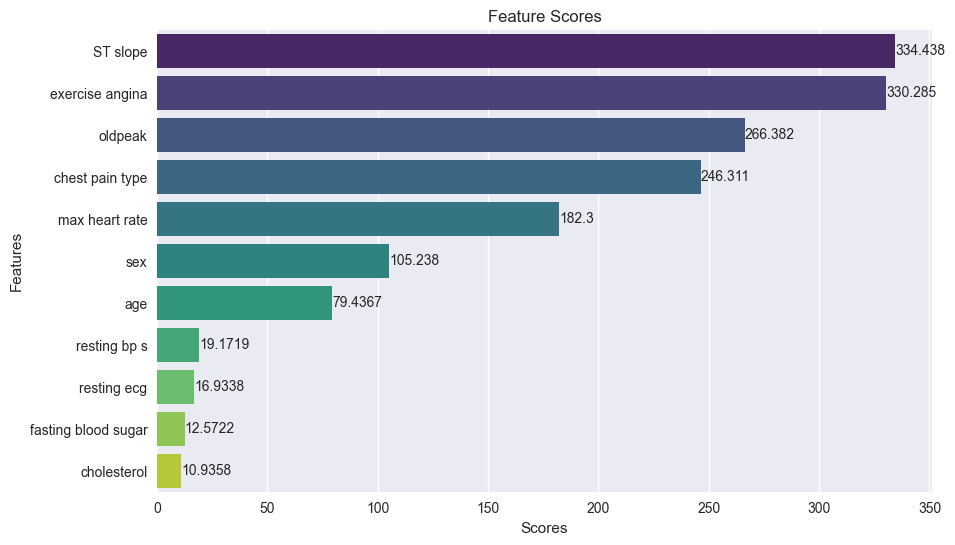

<Figure size 800x550 with 0 Axes>

time: 171 ms (started: 2024-08-30 15:52:38 -05:00)


In [338]:
# Feature selection using SelectKBest with ANOVA F-value
X = df.drop(["target"], axis = 1)  
y = df["target"] 
selector = SelectKBest(f_classif, k=13)
X_selected = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
feature_scores = selector.scores_[selector.get_support()]

# Create a DataFrame to store the feature names and their scores
feature_scores_data_set = pd.DataFrame({'Features': selected_features, 'Scores': feature_scores})

# Sort the DataFrame by score in descending order
feature_scores_data_set = feature_scores_data_set.sort_values(by='Scores', ascending=False)

# Plot the feature scores
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Scores', y='Features', data=feature_scores_data_set, palette='viridis')
plt.title('Feature Scores')
plt.xlabel('Scores')
plt.ylabel('Features')
for i in ax.containers:
    ax.bar_label(i,)
plt.show()
plt.savefig("output.png")

In [339]:
X
    

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope
0,40,1,2,140,289,0,0,172,0,0.0,1
1,49,0,3,160,180,0,0,156,0,1.0,2
2,37,1,2,130,283,0,1,98,0,0.0,1
3,48,0,4,138,214,0,0,108,1,1.5,2
4,54,1,3,150,195,0,0,122,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
933,45,1,1,110,264,0,0,132,0,1.2,2
934,68,1,4,144,193,1,0,141,0,3.4,2
935,57,1,4,130,131,0,0,115,1,1.2,2
936,57,0,2,130,236,0,2,174,0,0.0,2


time: 5.38 ms (started: 2024-08-30 15:52:39 -05:00)


In [340]:
feature_scores_data_set

,Features,Scores
10,ST slope,334.438420
8,exercise angina,330.285235
9,oldpeak,266.381946
2,chest pain type,246.310825
7,max heart rate,182.300179
1,sex,105.238365
0,age,79.436685
3,resting bp s,19.171947
6,resting ecg,16.933771
5,fasting blood sugar,12.572207


time: 8.48 ms (started: 2024-08-30 15:52:39 -05:00)


## Feature selection with ExtraTreesClassifier

[0.08 0.07 0.12 0.08 0.07 0.02 0.04 0.1  0.15 0.12 0.15]


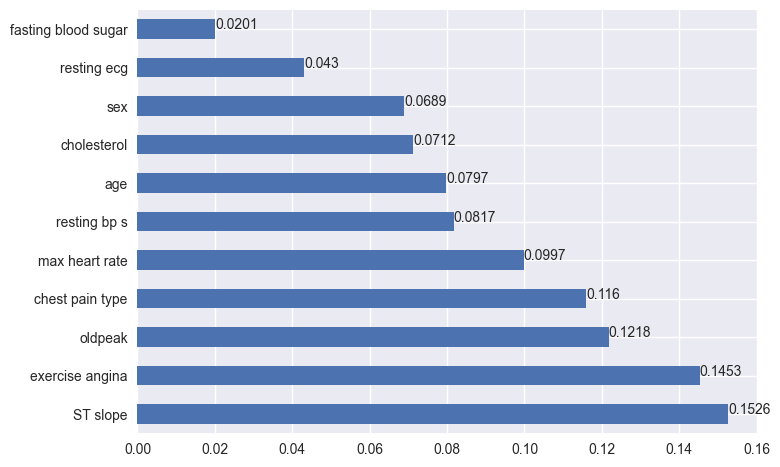

time: 173 ms (started: 2024-08-30 15:52:40 -05:00)


In [341]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X, y)


print(model.feature_importances_)


feat_importances = pd.Series(model.feature_importances_, index=X.columns)


feat_importances.nlargest(13).plot(kind='barh')


for index, value in enumerate(feat_importances.nlargest(13)):
    plt.text(value, index, str(round(value, 4)))


plt.show()

In [342]:
# print (X)
X = X.drop(["fasting blood sugar", "resting ecg", "cholesterol","age"], axis = 1)

time: 503 µs (started: 2024-08-30 15:52:40 -05:00)


In [343]:
X.columns

Index(['sex', 'chest pain type', 'resting bp s', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope'],
      dtype='object')

time: 4.01 ms (started: 2024-08-30 15:52:40 -05:00)


In [344]:
y

0      0
1      1
2      0
3      1
4      0
      ..
933    1
934    1
935    1
936    1
937    0
Name: target, Length: 938, dtype: int64

time: 5.77 ms (started: 2024-08-30 15:52:41 -05:00)


In [345]:
# #Scale all values for good Accuracy
# sc = StandardScaler()
# col = ['age', 'sex', 'chest pain type', 'resting bp s', 'max heart rate',
#        'exercise angina', 'oldpeak', 'ST slope']
# X[col] = sc.fit_transform(X[col])
# X.head()

time: 1.42 ms (started: 2024-08-30 15:52:41 -05:00)


## Split the data 


In [346]:
X_train , X_test  , y_train , y_test =train_test_split(X, y , test_size=0.2 , random_state=4)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

time: 9.3 ms (started: 2024-08-30 15:52:41 -05:00)


In [347]:
X_train

,sex,chest pain type,resting bp s,max heart rate,exercise angina,oldpeak,ST slope
260,1,4,140,170,0,0.0,1
326,1,3,130,144,0,0.1,1
376,1,4,140,159,1,1.5,1
668,1,4,140,155,1,3.1,3
575,1,3,120,194,0,0.8,3
...,...,...,...,...,...,...,...
897,1,2,156,143,0,0.0,1
709,1,4,112,153,0,0.0,1
439,0,3,120,170,0,0.0,1
174,1,4,120,138,1,1.0,2


time: 11.9 ms (started: 2024-08-30 15:52:42 -05:00)


In [348]:
X_test

,sex,chest pain type,resting bp s,max heart rate,exercise angina,oldpeak,ST slope
92,1,4,120,140,0,0.0,1
799,0,3,102,160,0,0.0,1
374,1,4,145,110,1,1.8,2
152,1,2,120,150,0,0.0,1
133,0,2,120,150,0,1.0,2
...,...,...,...,...,...,...,...
209,1,3,120,140,0,0.0,1
304,1,4,146,148,1,3.0,3
273,1,3,110,99,1,1.3,2
495,1,4,124,109,1,2.2,2


time: 11.5 ms (started: 2024-08-30 15:52:42 -05:00)


## Scale data with MinMaxScaler and OneHotEncoder

In [349]:
dataset_num=X_train[["resting bp s", "max heart rate"]]
dataset_cat=X_train[["sex","chest pain type", "exercise angina" , "oldpeak" , "ST slope"]]



time: 3.9 ms (started: 2024-08-30 15:52:43 -05:00)


In [350]:

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler , OneHotEncoder , MinMaxScaler , OrdinalEncoder

std_list=list(dataset_num)
cat_list=list(dataset_cat)
full_pipeline=ColumnTransformer([
    ("std" , MinMaxScaler() , std_list),
    ("1hot" ,OneHotEncoder(handle_unknown = "ignore")  , cat_list),
])
x_train_prepared=full_pipeline.fit_transform(X_train)
# x_train_prepared.toarray()

# x_prepared = full_pipeline.fit_transform(X_train)
x_train_prepared.toarray()
x_test_prepared = full_pipeline.transform(X_test)


time: 21.6 ms (started: 2024-08-30 15:52:43 -05:00)


In [351]:
# full_pipeline.fit_transform(X_test)

time: 229 µs (started: 2024-08-30 15:52:43 -05:00)


In [352]:
from sklearn.metrics import precision_score , recall_score , f1_score , accuracy_score
from sklearn.model_selection import cross_val_predict , GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report , confusion_matrix 
from sklearn.metrics import ConfusionMatrixDisplay
import warnings
warnings.filterwarnings("ignore")
import itertools    
from sklearn.feature_selection import SelectKBest , f_regression

time: 2.26 ms (started: 2024-08-30 15:52:43 -05:00)


In [353]:
sample_data=X_train.iloc[:10]
sample_label=y_train[:10]
sample_data_pre=full_pipeline.transform(sample_data)

time: 10.3 ms (started: 2024-08-30 15:52:44 -05:00)


In [354]:
# I picked this code from the IBM course for classification
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')

time: 2.45 ms (started: 2024-08-30 15:52:44 -05:00)


In [355]:
def sample_data(model):
    print ("prediction :" ,  model.predict(sample_data_pre))
    print  ("labels:" ,  list(sample_label))

time: 743 µs (started: 2024-08-30 15:52:45 -05:00)


In [356]:
def gridsearchcv(param_grid , model):
    
    grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search=grid.fit(x_train_prepared, y_train)
    print("Best Hyperparameters:", grid_search.best_params_)
    print("Best Accuracy:", grid_search.best_score_)

time: 1.4 ms (started: 2024-08-30 15:52:45 -05:00)


In [357]:
knn= KNeighborsClassifier(metric= 'euclidean', n_neighbors= 3, weights='distance', algorithm='ball_tree')
knn.fit(x_train_prepared,y_train)

# sample_data(knn)

KNeighborsClassifier(algorithm='ball_tree', metric='euclidean', n_neighbors=3,
                     weights='distance')

time: 11.7 ms (started: 2024-08-30 15:52:46 -05:00)


In [358]:
knn_pred = cross_val_predict(knn, x_train_prepared, y_train, cv=20)
precision = precision_score(y_train, knn_pred)
recall = recall_score(y_train, knn_pred)
fscore=f1_score(y_train ,knn_pred )
accuracy=accuracy_score(y_train ,knn_pred)
print(f"Precision score: {precision}")
print(f"Recall score: {recall}")
print(f"fscore score: {fscore}")
print(f"accuracy score: {accuracy}")

Precision score: 0.90625
Recall score: 0.8868501529051988
fscore score: 0.8964451313755796
accuracy score: 0.9106666666666666
time: 64.8 ms (started: 2024-08-30 15:52:46 -05:00)


## Evaluation of KNN

In [359]:
x_test_predict = knn.predict(x_test_prepared)
print(f"Precision_Score:{precision_score(y_test , x_test_predict)}")
print(f"Recall_Score:{recall_score(y_test , x_test_predict)}")
print(f"Accuracy:{accuracy_score(y_test , x_test_predict)}")

Precision_Score:0.9010989010989011
Recall_Score:0.8723404255319149
Accuracy:0.8882978723404256
time: 18.4 ms (started: 2024-08-30 15:52:47 -05:00)


## s

In [360]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9], 
    'weights': ['uniform', 'distance'], 
    'metric': ['euclidean', 'manhattan'] 
}
gridsearchcv(param_grid_knn , KNeighborsClassifier() )

Best Hyperparameters: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
Best Accuracy: 0.9173333333333332
time: 469 ms (started: 2024-08-30 15:52:48 -05:00)


              precision    recall  f1-score   support

           0       0.91      0.93      0.92       423
           1       0.91      0.89      0.90       327

    accuracy                           0.91       750
   macro avg       0.91      0.91      0.91       750
weighted avg       0.91      0.91      0.91       750

Confusion matrix, without normalization
[[393  30]
 [ 37 290]]


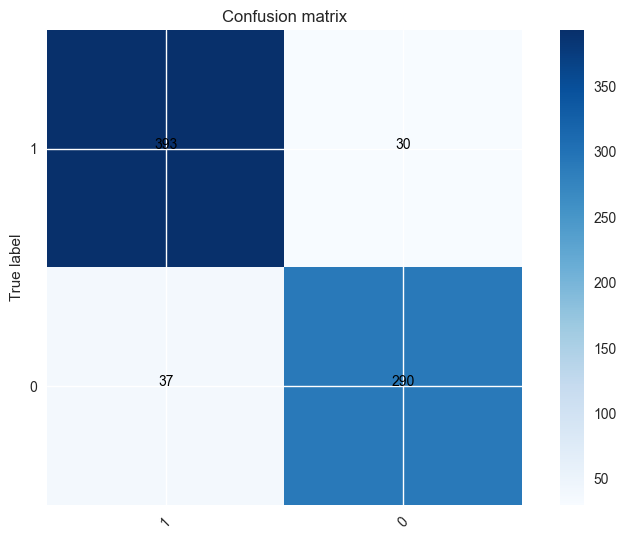

time: 88.2 ms (started: 2024-08-30 15:52:48 -05:00)


In [361]:
cm=confusion_matrix(y_train, knn_pred)
np.set_printoptions(precision=2)
print (classification_report(y_train, knn_pred))
plt.figure()
plot_confusion_matrix(cm, classes=['1','0'],normalize= False,  title='Confusion matrix')

# Decision tree

In [362]:
tree= DecisionTreeClassifier(criterion= 'gini', max_depth =20, max_features='sqrt', min_samples_leaf= 4,min_samples_split=10, random_state=None, splitter='random')
tree.fit(x_train_prepared,y_train)
sample_data(tree)

prediction : [0 0 1 1 0 1 1 0 1 0]
labels: [0, 0, 1, 1, 0, 1, 0, 1, 1, 0]
time: 7.12 ms (started: 2024-08-30 15:52:55 -05:00)


In [363]:
tree_pred = cross_val_predict(tree, x_train_prepared, y_train, cv=5)
precision = precision_score(y_train, tree_pred)
recall = recall_score(y_train, tree_pred)
fscore=f1_score(y_train ,tree_pred )
accuracy=accuracy_score(y_train ,tree_pred)
print(f"Precision score: {precision}")
print(f"Recall score: {recall}")
print(f"fscore score: {fscore}")
print(f"accuracy score: {accuracy}")

Precision score: 0.744807121661721
Recall score: 0.7675840978593272
fscore score: 0.7560240963855421
accuracy score: 0.784
time: 22.8 ms (started: 2024-08-30 15:52:56 -05:00)


In [364]:
param_grid_tree = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'random_state': [None, 42]  
}
gridsearchcv(param_grid_tree , DecisionTreeClassifier())

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': None, 'splitter': 'random'}
Best Accuracy: 0.9
time: 5.97 s (started: 2024-08-30 15:52:57 -05:00)


              precision    recall  f1-score   support

           0       0.82      0.80      0.81       423
           1       0.74      0.77      0.76       327

    accuracy                           0.78       750
   macro avg       0.78      0.78      0.78       750
weighted avg       0.78      0.78      0.78       750

Confusion matrix, without normalization
[[337  86]
 [ 76 251]]


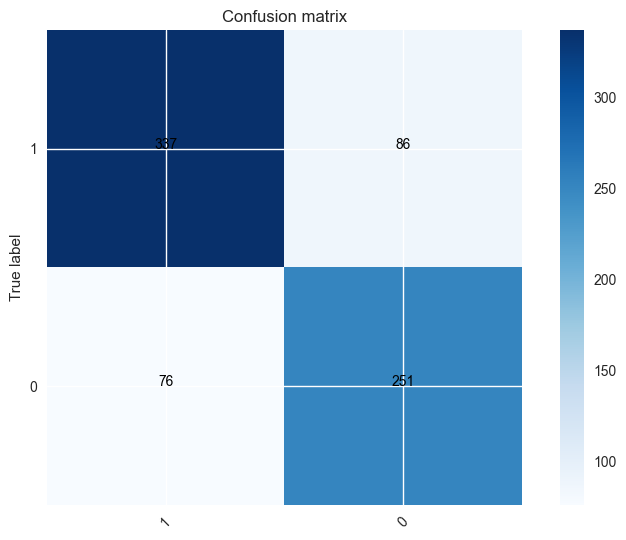

time: 82 ms (started: 2024-08-30 15:53:03 -05:00)


In [365]:
cm=confusion_matrix(y_train, tree_pred)
np.set_printoptions(precision=2)
print (classification_report(y_train, tree_pred))
plt.figure()
plot_confusion_matrix(cm, classes=['1','0'],normalize= False,  title='Confusion matrix')

## Evaluation of  Decision tree

In [374]:
# x_test_predict=tree.predict(x_test_prepared)
# print(f"Precision_Score:{precision_score(y_test , x_test_predict)}")
# print(f"Recall_Score:{recall_score(y_test , x_test_predict)}")
# print(f"Accuracy:{accuracy_score(y_test , x_test_predict)}")

expected_yt  = y_test
predicted_yt = tree.predict(x_test_prepared) 
# print classification report and confusion matrix for svm classifier
print("Classification report: \n",classification_report(expected_yt, predicted_yt))
print("Confusion matrix: \n",confusion_matrix(expected_yt, predicted_yt))

Classification report: 
               precision    recall  f1-score   support

           0       0.81      0.86      0.84        94
           1       0.85      0.80      0.82        94

    accuracy                           0.83       188
   macro avg       0.83      0.83      0.83       188
weighted avg       0.83      0.83      0.83       188

Confusion matrix: 
 [[81 13]
 [19 75]]
time: 14.1 ms (started: 2024-08-30 17:49:32 -05:00)


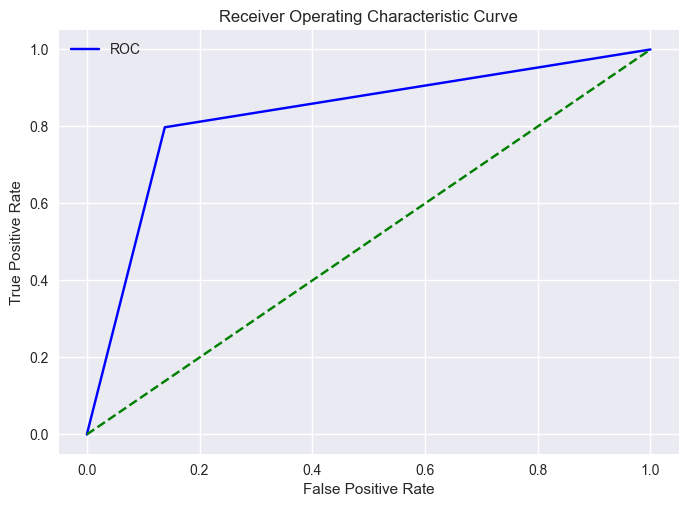

time: 106 ms (started: 2024-08-30 17:49:36 -05:00)


In [375]:
# ROC curve of LR
plt.style.use('seaborn-v0_8')

def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='blue', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()
    
fper, tper, thresholds = roc_curve(expected_yt, predicted_yt)
plot_roc_curve(fper, tper)

# Logistic regression

In [367]:
lr = LogisticRegression(C= 1, penalty= 'l2')
lr.fit(x_train_prepared,y_train)
sample_data(lr)

prediction : [0 0 1 1 0 1 1 1 1 0]
labels: [0, 0, 1, 1, 0, 1, 0, 1, 1, 0]
time: 11.9 ms (started: 2024-08-30 15:53:03 -05:00)


In [368]:
lr_pred = cross_val_predict(lr, x_train_prepared, y_train, cv=5)
precision = precision_score(y_train, lr_pred)
recall = recall_score(y_train, lr_pred)
fscore=f1_score(y_train ,lr_pred )
accuracy=accuracy_score(y_train ,lr_pred)
print(f"Precision score: {precision}")
print(f"Recall score: {recall}")
print(f"fscore score: {fscore}")
print(f"accuracy score: {accuracy}")

Precision score: 0.8126888217522659
Recall score: 0.8226299694189603
fscore score: 0.817629179331307
accuracy score: 0.84
time: 39.6 ms (started: 2024-08-30 15:53:07 -05:00)


In [369]:
param_grid_lr = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100] 
}
gridsearchcv(param_grid_lr , LogisticRegression())

Best Hyperparameters: {'C': 100, 'penalty': 'l2'}
Best Accuracy: 0.8413333333333333
time: 118 ms (started: 2024-08-30 15:53:08 -05:00)


              precision    recall  f1-score   support

           0       0.86      0.85      0.86       423
           1       0.81      0.82      0.82       327

    accuracy                           0.84       750
   macro avg       0.84      0.84      0.84       750
weighted avg       0.84      0.84      0.84       750

Confusion matrix, without normalization
[[361  62]
 [ 58 269]]


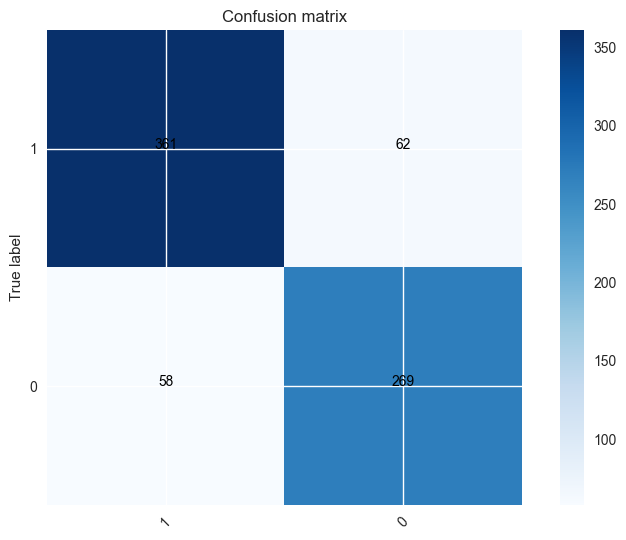

time: 116 ms (started: 2024-08-30 15:53:13 -05:00)


In [370]:
cm=confusion_matrix(y_train, lr_pred)
np.set_printoptions(precision=2)
print (classification_report(y_train, lr_pred))
plt.figure()
plot_confusion_matrix(cm, classes=['1','0'],normalize= False,  title='Confusion matrix')

## Evaluation of logistic

In [376]:
# x_test_predict=lr.predict(x_test_prepared)
# print(f"Precision_Score:{precision_score(y_test , x_test_predict)}")
# print(f"Recall_Score:{recall_score(y_test , x_test_predict)}")
# print(f"Accuracy:{accuracy_score(y_test , x_test_predict)}")
# classification report of lr
expected_yl  = y_test
predicted_yl= lr.predict(x_test_prepared) 
# print classification report and confusion matrix for svm classifier
print("Classification report: \n",classification_report(expected_yl, predicted_yl))
print("Confusion matrix: \n",confusion_matrix(expected_yl, predicted_yl))

Classification report: 
               precision    recall  f1-score   support

           0       0.85      0.88      0.86        94
           1       0.88      0.84      0.86        94

    accuracy                           0.86       188
   macro avg       0.86      0.86      0.86       188
weighted avg       0.86      0.86      0.86       188

Confusion matrix: 
 [[83 11]
 [15 79]]
time: 12.8 ms (started: 2024-08-30 17:50:20 -05:00)


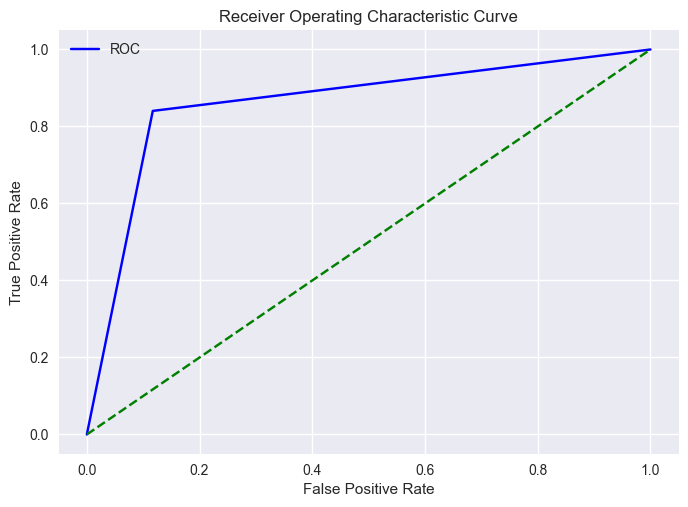

time: 105 ms (started: 2024-08-30 17:50:20 -05:00)


In [377]:
# ROC curve of LR
plt.style.use('seaborn-v0_8')

def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='blue', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()
    
fper, tper, thresholds = roc_curve(expected_yl, predicted_yl)
plot_roc_curve(fper, tper)

# SVM

In [255]:
svm= SVC(C= 1000, gamma= 1, kernel='rbf')
svm.fit(x_train_prepared,y_train)
sample_data(svm)

prediction : [0 0 1 1 0 1 0 1 1 0]
labels: [0, 0, 1, 1, 0, 1, 0, 1, 1, 0]
time: 44 ms (started: 2024-08-25 21:19:31 -05:00)


In [256]:
svm_pred = cross_val_predict(svm, x_train_prepared, y_train, cv=5)
precision = precision_score(y_train, svm_pred)
recall = recall_score(y_train, svm_pred)
fscore=f1_score(y_train ,svm_pred )
accuracy=accuracy_score(y_train ,svm_pred)
print(f"Precision score: {precision}")
print(f"Recall score: {recall}")
print(f"fscore score: {fscore}")
print(f"accuracy score: {accuracy}")

Precision score: 0.8972602739726028
Recall score: 0.8012232415902141
fscore score: 0.8465266558966075
accuracy score: 0.8733333333333333
time: 83.6 ms (started: 2024-08-25 21:19:34 -05:00)


In [258]:
param_grid_svm = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],}  
gridsearchcv(param_grid_svm , SVC())

Best Hyperparameters: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
Best Accuracy: 0.8853333333333333
time: 17.6 s (started: 2024-08-25 21:19:58 -05:00)


              precision    recall  f1-score   support

           0       0.86      0.85      0.86       423
           1       0.81      0.82      0.82       327

    accuracy                           0.84       750
   macro avg       0.84      0.84      0.84       750
weighted avg       0.84      0.84      0.84       750

Confusion matrix, without normalization
[[361  62]
 [ 58 269]]


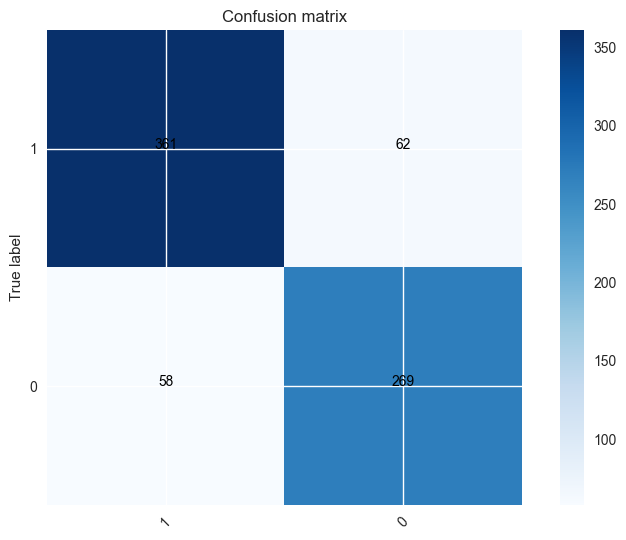

time: 111 ms (started: 2024-08-25 21:23:42 -05:00)


In [260]:
cm=confusion_matrix(y_train, lr_pred)
np.set_printoptions(precision=2)
print (classification_report(y_train, lr_pred))
plt.figure()
plot_confusion_matrix(cm, classes=['1','0'],normalize= False,  title='Confusion matrix')

## Evaluation of SVM

In [378]:

# classification report of SVM
expected_ys  = y_test
predicted_ys = svm.predict(x_test_prepared) 

# print classification report and confusion matrix for svm classifier
print("Classification report: \n",classification_report(expected_ys, predicted_ys))
print("Confusion matrix: \n",confusion_matrix(expected_ys, predicted_ys))
# x_test_predict=svm.predict(x_test_prepared)
# print(f"Precision_Score:{precision_score(y_test , x_test_predict)}")
# print(f"Recall_Score:{recall_score(y_test , x_test_predict)}")
# print(f"Accuracy:{accuracy_score(y_test , x_test_predict)}")

Classification report: 
               precision    recall  f1-score   support

           0       0.79      0.95      0.86        94
           1       0.93      0.76      0.84        94

    accuracy                           0.85       188
   macro avg       0.86      0.85      0.85       188
weighted avg       0.86      0.85      0.85       188

Confusion matrix: 
 [[89  5]
 [23 71]]
time: 17.5 ms (started: 2024-08-30 17:50:41 -05:00)


In [262]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

#sklearn
from sklearn.svm import SVC 
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score

time: 3.29 ms (started: 2024-08-25 21:24:19 -05:00)


In [263]:
#qiskit
from qiskit import *
from qiskit.circuit import Parameter
from qiskit.circuit.library import ZZFeatureMap, ZFeatureMap, TwoLocal, RealAmplitudes
# from qiskit.utils import QuantumInstance, algorithm_globals
from qiskit_machine_learning.algorithms import QSVC, NeuralNetworkClassifier,VQC


time: 3.15 ms (started: 2024-08-25 21:24:20 -05:00)


In [264]:
# from qiskit_machine_learning.algorithms.NeuralNetworkClassifier import VQC
# from qiskit_machine_learning.kernels import QuantumKernel
from qiskit_algorithms.optimizers import SPSA, L_BFGS_B, COBYLA
# from qiskit_machine_learning.neural_networks import CircuitQNN
# from qiskit_machine_learning.exceptions import QiskitMachineLearningError
from IPython.display import clear_output
from typing import Union


time: 2.85 ms (started: 2024-08-25 21:24:20 -05:00)


In [265]:
from qiskit_algorithms.state_fidelities import ComputeUncompute
from qiskit.primitives import Sampler
from qiskit_machine_learning.kernels import FidelityQuantumKernel

from qiskit_machine_learning.neural_networks import SamplerQNN



import warnings
warnings.filterwarnings('ignore')

time: 2.73 ms (started: 2024-08-25 21:24:21 -05:00)


In [266]:
df = pd.read_csv('heart_statlog_cleveland_hungary_final.csv')
df

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


time: 22.2 ms (started: 2024-08-25 21:24:21 -05:00)


In [267]:
# from sklearn.feature_selection import RFE
# from sklearn.svm import SVC

# X = data.drop(['target'] ,axis="columns")
# y = data['target']

# estimator = SVC(kernel="linear")
# selector = RFE(estimator, n_features_to_select=6, step=1)
# # selector = selector.fit(X, y)

time: 758 µs (started: 2024-08-25 21:24:22 -05:00)


In [268]:
# from operator import itemgetter
# features = X.columns.to_list()
# for x, y in (sorted(zip(selector.ranking_ , features), key=itemgetter(0))):
#     print(x, y)

time: 741 µs (started: 2024-08-25 21:24:22 -05:00)


# Classical classifiers

## SVM

In [269]:
# # classical SVM
# # X = data[['ca','cp','thal','exang','slope']]
# # y = data['target']

# # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# # Create svm Classifier
# ClassifierSVM = SVC()

# # Train the model using the training set
# ClassifierSVM.fit(x_train_prepared,y_train)

# # Predict the response for test dataset
# y_pred = ClassifierSVM.predict(x_train_prepared)

# # Model Accuracy: 
# print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

time: 907 µs (started: 2024-08-25 21:24:24 -05:00)


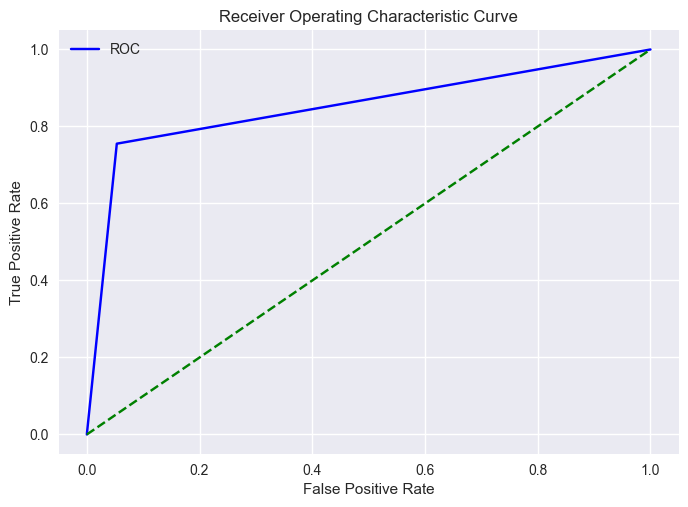

time: 102 ms (started: 2024-08-30 17:50:52 -05:00)


In [379]:
# ROC curve of SVM
plt.style.use('seaborn-v0_8')

def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='blue', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()
    
fper, tper, thresholds = roc_curve(expected_ys, predicted_ys)
plot_roc_curve(fper, tper)

### QSV

In [271]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import StandardScaler , OneHotEncoder , MinMaxScaler , OrdinalEncoder

# std_list=list(dataset_num)
# cat_list=list(dataset_cat)
# full_pipeline=ColumnTransformer([
#     ("std" , MinMaxScaler() , std_list),
#     ("1hot" ,OneHotEncoder(handle_unknown = "ignore")  , cat_list),
# ])
# x_train_prepared=full_pipeline.fit_transform(X_train)
# # x_train_prepared.toarray()

# x_prepared = full_pipeline.fit_transform(X_train)
# x_train_prepared.toarray()
# x_test_prepared = full_pipeline.transform(X_test)

time: 667 µs (started: 2024-08-25 21:24:26 -05:00)


In [272]:
# X = data[['ca','cp','thal','exang','slope']]
# y = data['target']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# samples = np.append(x_train_prepared, x_test_prepared, axis=0)
# minmax_scaler = MinMaxScaler((0, 1)).fit(samples)
# X_train = minmax_scaler.transform(X_train)
# X_test = minmax_scaler.transform(X_test)
# x_test_prepared


time: 488 µs (started: 2024-08-25 21:24:27 -05:00)


In [273]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# samples = np.append(X_train, X_test, axis=0)
# minmax_scaler = MinMaxScaler((0, 1)).fit(samples)
# X_train = minmax_scaler.transform(X_train)
# X_test = minmax_scaler.transform(X_test)

time: 5.84 ms (started: 2024-08-25 21:24:29 -05:00)


In [274]:
samples = np.append(X_train, X_test, axis=0)

time: 1.99 ms (started: 2024-08-25 21:24:30 -05:00)


In [275]:
minmax_scaler = MinMaxScaler((0, 1)).fit(samples)
X_train = minmax_scaler.transform(X_train)
X_test = minmax_scaler.transform(X_test)

time: 7.74 ms (started: 2024-08-25 21:24:31 -05:00)


In [276]:
# number of qubits is equal to the number of features
num_qubits = 5
# regularization parameter
C = 1000

time: 834 µs (started: 2024-08-25 21:24:31 -05:00)


In [277]:
fidelity = ComputeUncompute(sampler=Sampler())
feature_map = ZFeatureMap(feature_dimension=num_qubits, reps=2) # ZZFeatureMap(2)
new_kernel = FidelityQuantumKernel(feature_map=feature_map, fidelity=fidelity)
qsvc = QSVC(quantum_kernel=new_kernel, C=C)

time: 30.1 ms (started: 2024-08-25 21:24:38 -05:00)


In [278]:
X_train.shape

(750, 7)

time: 3.71 ms (started: 2024-08-25 21:24:38 -05:00)


In [279]:
X_test.shape

(188, 7)

time: 2.51 ms (started: 2024-08-25 21:24:39 -05:00)


In [280]:
%%time
X_test.shape

CPU times: user 14 µs, sys: 2 µs, total: 16 µs
Wall time: 23.8 µs


(188, 7)

time: 6.75 ms (started: 2024-08-25 21:24:44 -05:00)


In [281]:
# training

qsvc.fit(X_train,y_train)

# testing
qsvc_score = qsvc.score(X_test, y_test)
print(f"QSVC classification test score: {qsvc_score}")

QSVC classification test score: 0.898936170212766
time: 17min 10s (started: 2024-08-25 21:24:44 -05:00)


## Qsvc performance

In [282]:
# classification report of QSVC
expected_y = y_test
predicted_y = qsvc.predict(X_test) 

# print classification report and confusion matrix for the classifier
print("Classification report: \n", metrics.classification_report(expected_y, predicted_y))
print("Confusion matrix: \n", metrics.confusion_matrix(expected_y, predicted_y))

Classification report: 
               precision    recall  f1-score   support

           0       0.92      0.89      0.91       102
           1       0.88      0.91      0.89        86

    accuracy                           0.90       188
   macro avg       0.90      0.90      0.90       188
weighted avg       0.90      0.90      0.90       188

Confusion matrix: 
 [[91 11]
 [ 8 78]]
time: 4min 52s (started: 2024-08-25 21:55:05 -05:00)


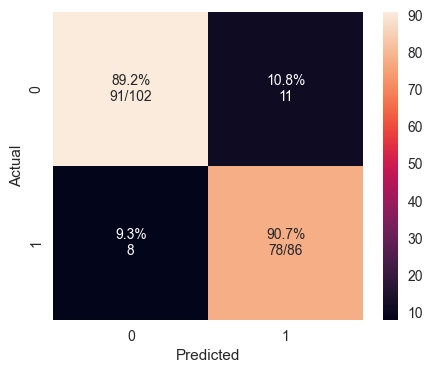

time: 154 ms (started: 2024-08-25 22:19:40 -05:00)


In [283]:
# confusion matrix of QSVC
def cm_analysis(y_true, y_pred, labels, ymap=None, figsize=(5,4)): 
    if ymap is not None: 
        y_pred = [ymap[yi] for yi in y_pred] 
        y_true = [ymap[yi] for yi in y_true] 
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels) 
    cm_sum = np.sum(cm, axis=1, keepdims=True) 
    cm_perc = cm / cm_sum.astype(float) * 100 
    annot = np.empty_like(cm).astype(str) 
    nrows, ncols = cm.shape 
    for i in range(nrows): 
        for j in range(ncols): 
            c = cm[i, j] 
            p = cm_perc[i, j] 
            if i == j: 
                s = cm_sum[i] 
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s) 
            elif c == 0: 
                annot[i, j] = '' 
            else: 
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=labels, columns=labels) 
    cm.index.name = 'Actual' 
    cm.columns.name = 'Predicted' 
    fig, ax = plt.subplots(figsize=figsize) 
    sns.heatmap(cm, annot=annot, fmt='', ax=ax) 
    
cm_analysis(y_test, predicted_y, labels=[0,1], ymap=None, figsize=(5,4)) 

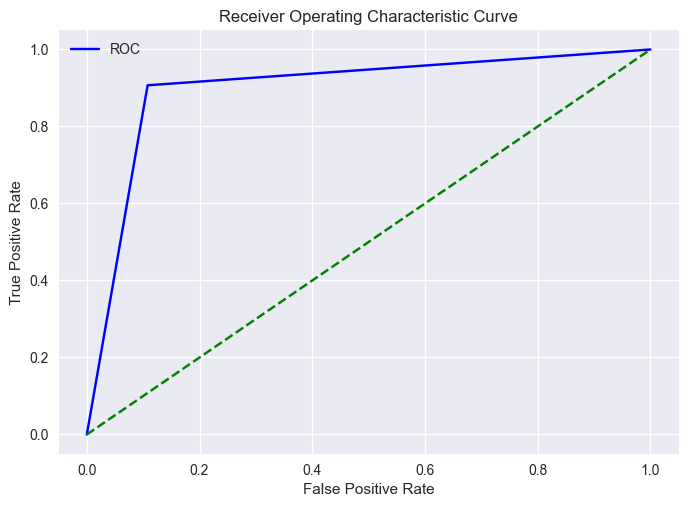

time: 106 ms (started: 2024-08-25 22:20:23 -05:00)


In [284]:
# ROC curve of QSVC
plt.style.use('seaborn-v0_8')

def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='blue', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()
    
fper, tper, thresholds = roc_curve(expected_y, predicted_y)
plot_roc_curve(fper, tper)